In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# ====== Generating Dataset ====== #
r = np.random.rand(10000) * 3
theta = np.random.rand(10000) * 2*np.pi

y = r.astype(int)
r = r * (np.cos(theta) + 1)

x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

In [2]:
# ====== Split Dataset into Train, Validation, Test ====== #
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

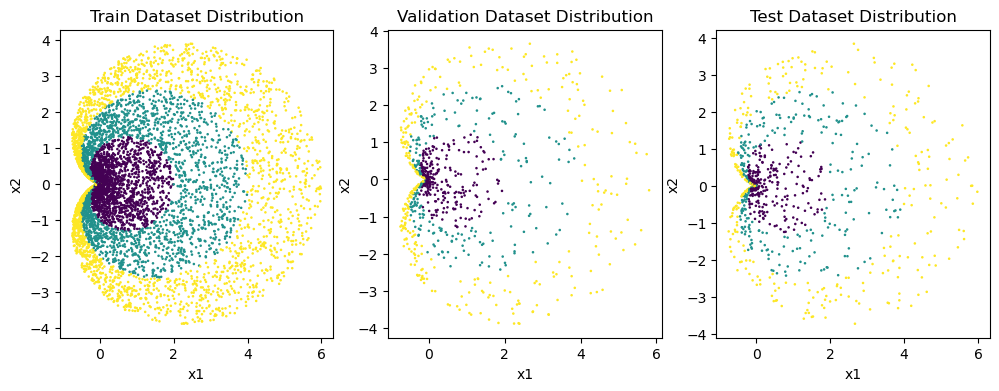

In [3]:
# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.scatter(train_X[:,0], train_X[:,1], c=train_y, s=0.7)
ax1.set_xlabel('x1'); ax1.set_ylabel('x2')
ax1.set_title('Train Dataset Distribution')

ax2 = fig.add_subplot(132)
ax2.scatter(val_X[:,0], val_X[:,1], c=val_y, s=0.7)
ax2.set_xlabel('x1'); ax2.set_ylabel('x2')
ax2.set_title('Validation Dataset Distribution')

ax3 = fig.add_subplot(133)
ax3.scatter(test_X[:,0], test_X[:,1], c=test_y, s=0.7)
ax3.set_xlabel('x1'); ax3.set_ylabel('x2')
ax3.set_title('Test Dataset Distribution')

plt.show()

In [4]:
# ====== Hypothesis Define ====== #
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.linear(x)
        x = self.softmax(x)
        return x

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

In [5]:
# ====== Cost Function Define ====== #
cls_loss = nn.CrossEntropyLoss()

# # Test Cost Function
# test_pred_y = torch.Tensor([[2, 0.1],
#                             [0, 1]])
# test_true_y1 = torch.Tensor([1,0]).long()   # true value: class index (should be int- type)
# test_true_y2 = torch.Tensor([0,1]).long()
#
# print(cls_loss(test_pred_y, test_true_y1))
# print(cls_loss(test_pred_y, test_true_y2))

1203 parameters


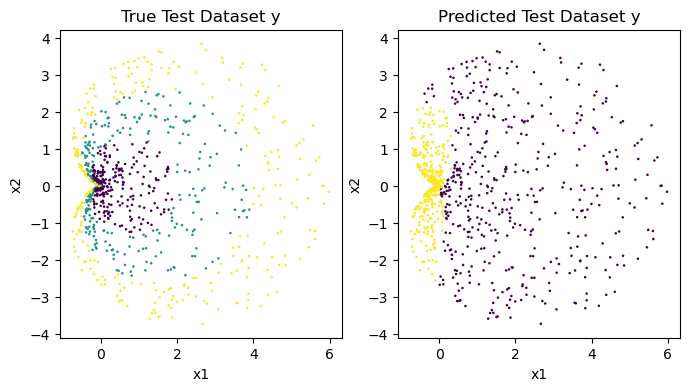

Epoch: 0, Accuracy: 30.20 %


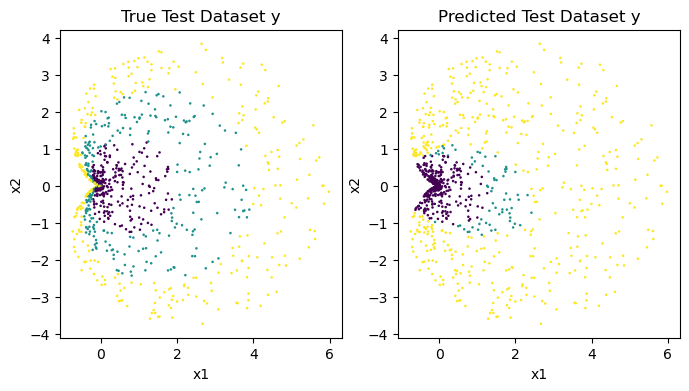

Epoch: 200, Accuracy: 54.80 %


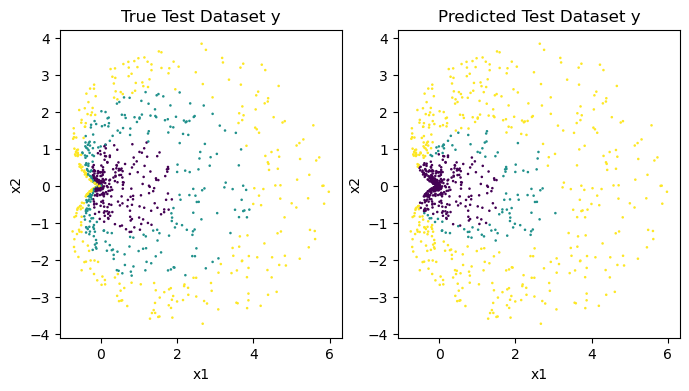

Epoch: 400, Accuracy: 62.10 %


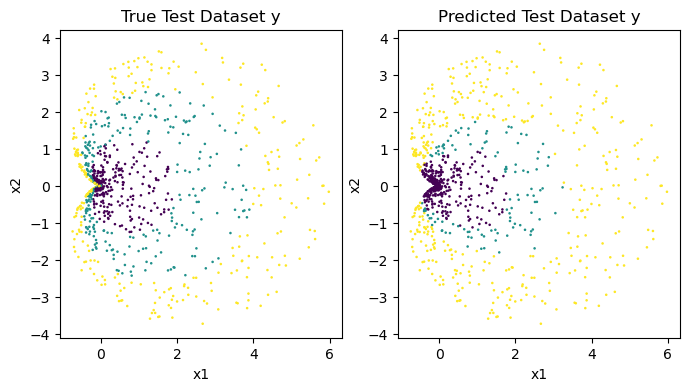

Epoch: 600, Accuracy: 65.60 %


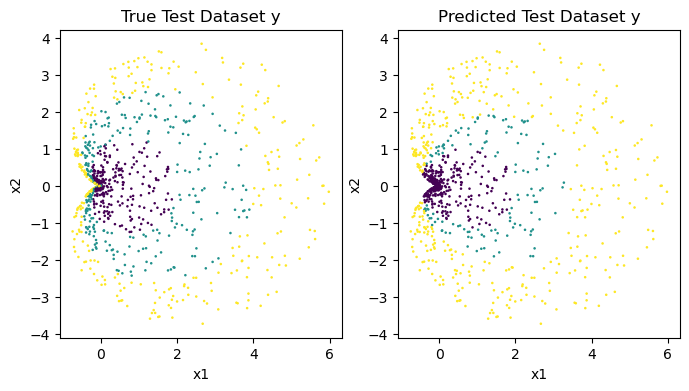

Epoch: 800, Accuracy: 68.60 %


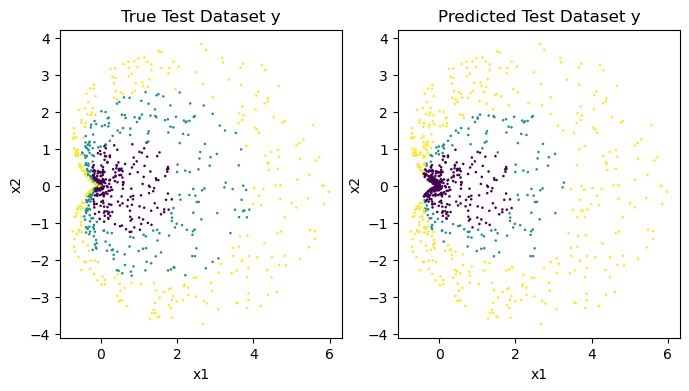

Epoch: 1000, Accuracy: 69.90 %


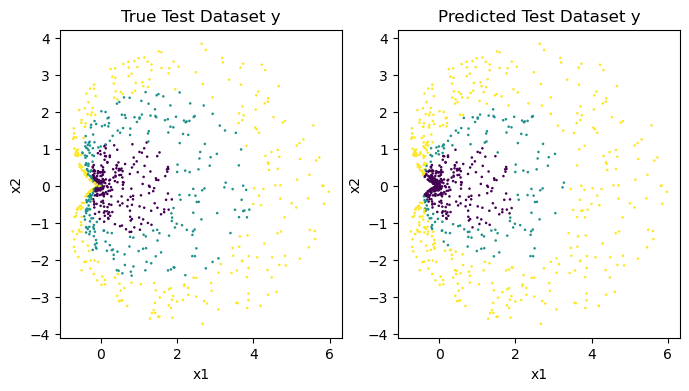

Epoch: 1200, Accuracy: 70.50 %


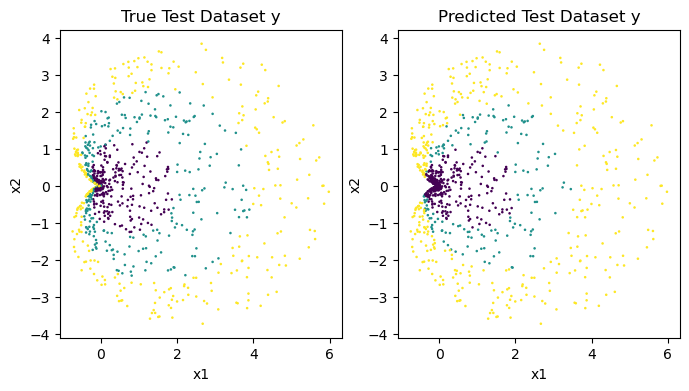

Epoch: 1400, Accuracy: 71.90 %


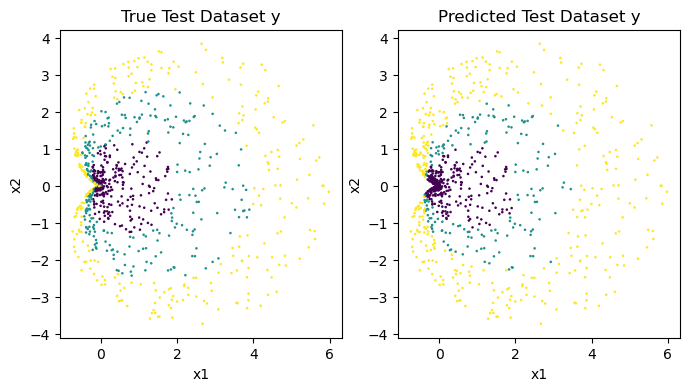

Epoch: 1600, Accuracy: 73.00 %


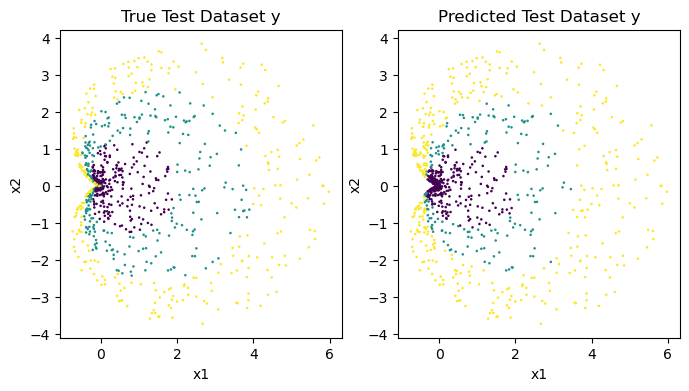

Epoch: 1800, Accuracy: 73.10 %


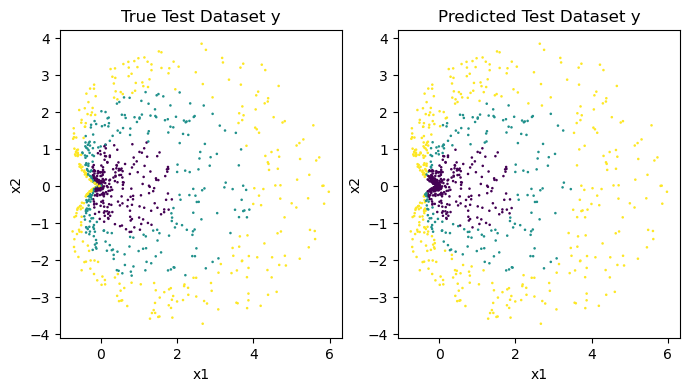

Epoch: 2000, Accuracy: 73.70 %


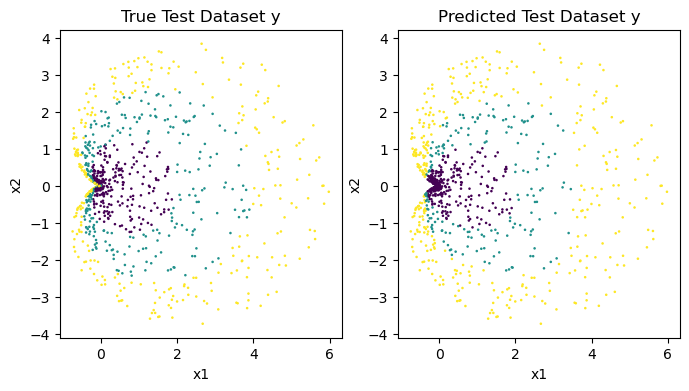

Epoch: 2200, Accuracy: 74.10 %


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ===== Construct Model ====== #
# model = LinearModel()
model = MLPModel()

print(f"{sum(p.numel() for p in model.parameters() if p.requires_grad)} parameters")

# ====== Construct Optimizar ====== #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

list_epoch = []

list_train_loss = []
list_val_loss = []

list_accuracy = []
list_accuracy_epoch = []

epoch = 4000
for i in range(epoch):

    # ====== Training ====== #
    model.train()
    optimizer.zero_grad()

    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long()
    pred_y = model(input_x)

    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()

    list_epoch.append(i)
    list_train_loss.append(loss.item())


    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()

    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)

    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.item())


    # ====== Evaluation ====== #
    if i % 200 == 0:

        # ====== Calculate Accuracy ====== #
        model.eval()
        optimizer.zero_grad()

        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y).long()
        pred_y = model(input_x).detach().max(dim=1)[1]

        accuracy = accuracy_score(true_y, pred_y)
        list_accuracy.append(accuracy)
        list_accuracy_epoch.append(i)

        fig = plt.figure(figsize=(8,4))

        # ====== True Y scattering ====== #
        ax1 = fig.add_subplot(121)
        ax1.scatter(test_X[:,0], test_X[:,1], c=test_y, s=0.7)
        ax1.set_xlabel('x1'); ax1.set_ylabel('x2')
        ax1.set_title('True Test Dataset y')

        # ====== Predicted Y scattering ====== #
        ax2 = fig.add_subplot(122)
        ax2.scatter(test_X[:,0], test_X[:,1], c=pred_y, s=0.7)
        ax2.set_xlabel('x1'); ax2.set_ylabel('x2')
        ax2.set_title('Predicted Test Dataset y')

        plt.show()
        print(f"Epoch: {i}, Accuracy: {accuracy*100:.2f} %")


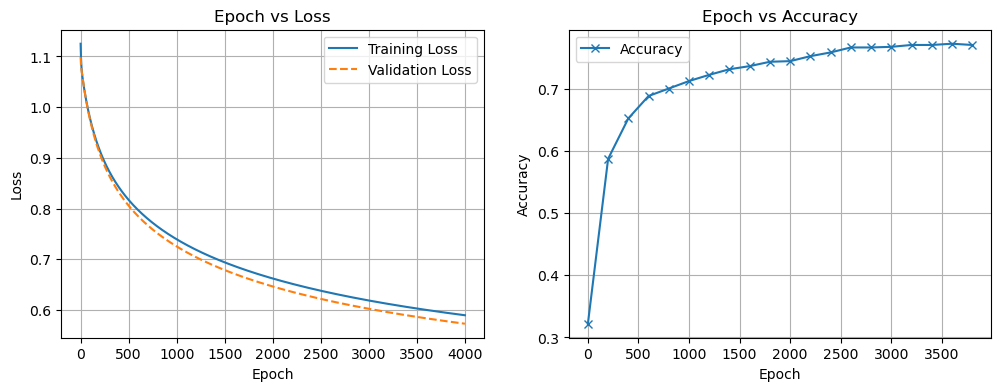

In [7]:
fig = plt.figure(figsize=(12,4))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(121)
ax1.plot(list_epoch, list_train_loss, label='Training Loss')
ax1.plot(list_epoch, list_val_loss, '--', label='Validation Loss')
ax1.legend()
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss')
ax1.grid()
ax1.set_title('Epoch vs Loss')

ax2 = fig.add_subplot(122)
ax2.plot(list_accuracy_epoch, list_accuracy, marker='x', label='Accuracy')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid()
ax2.set_title('Epoch vs Accuracy')

plt.show()